# LGM Internship - Lets Grow More
### Author: Harshit Singh
#### BEGINNER LEVEL TASK
#### Task1 - VIP Data Science Task
## Iris Flowers Classification ML Project

In [70]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.manifold import TSNE

In [71]:
# Read the dataset using pandas library by read_csv method.
data = pd.read_csv('/content/sample_data/Iris.csv')

In [72]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [74]:
data.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [75]:
data.shape

(150, 6)

In [76]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [77]:
data.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
150  5.9            3.0           5.1            1.8           Iris-virginica     1
56   5.7            2.8           4.5            1.3           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
                                                                                 ..
100  5.7            2.8           4.1            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
1    5.1            3.5           1.4            0.2           Iris-setosa       

In [78]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [79]:
actual_y=data['Species']

x=data.drop(['Id','Species'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


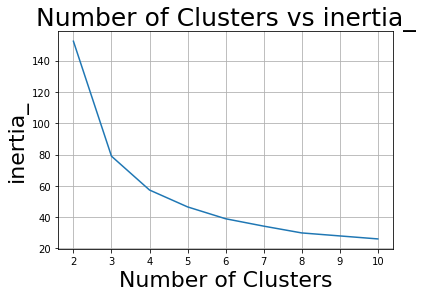

In [80]:
from sklearn.cluster import KMeans
#Here inertia means Sum of squared distances of samples to their closest cluster center.
number_of_clusters=[2,3,4,5,6,7,8,10]
inertia=[]
for i in number_of_clusters:
  kmeans=KMeans(n_clusters=i).fit(x)
  inertia.append(kmeans.inertia_)

plt.plot(number_of_clusters,inertia)
plt.xlabel('Number of Clusters',size=22)
plt.ylabel('inertia_',size=22)
plt.title('Number of Clusters vs inertia_',size=25)
plt.grid()
plt.show()

In [81]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

# add these predicted y's as column to our dataframe
x['predicted_y']=y_kmeans

In [82]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [83]:
y_mapping={1:'Setosa',2:'versicolour',0:'virginica'}

x['predicted_y']=x['predicted_y'].map(y_mapping)

In [84]:
setosa = x.loc[x.predicted_y == 'Setosa',['SepalLengthCm','SepalWidthCm']]
virginica = x.loc[x.predicted_y == 'virginica',['SepalLengthCm','SepalWidthCm']]
versicolour = x.loc[x.predicted_y == 'versicolour',['SepalLengthCm','SepalWidthCm']]

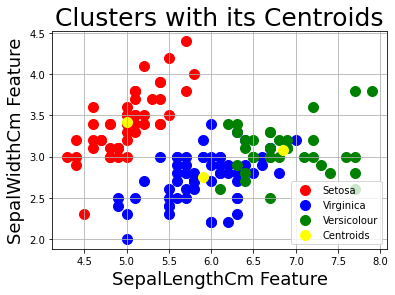

In [85]:
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], s = 100, c = 'red', label = 'Setosa')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], s = 100, c = 'blue', label = 'Virginica')
plt.scatter(versicolour['SepalLengthCm'], versicolour['SepalWidthCm'], s = 100, c = 'green', label = 'Versicolour')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

plt.xlabel('SepalLengthCm Feature',size=18)
plt.ylabel('SepalWidthCm Feature',size=18)
plt.title('Clusters with its Centroids',size=25)
plt.grid()
plt.show()

In [86]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [87]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   predicted_y    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [88]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [89]:
iris=data

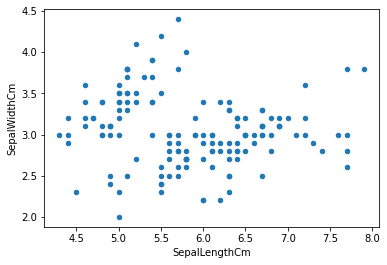

In [90]:
iris.plot(kind="scatter", x="SepalLengthCm", y= "SepalWidthCm")

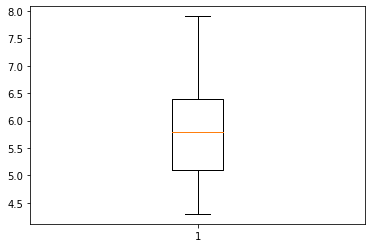

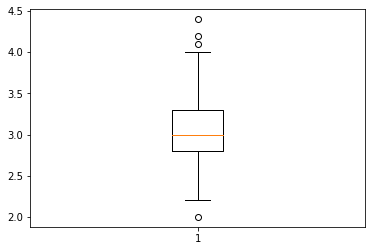

In [91]:
#Checking for outliars
plt.figure(1)
plt.boxplot([iris['SepalLengthCm']])
plt.figure(2)
plt.boxplot([iris['SepalWidthCm']])
plt.show()

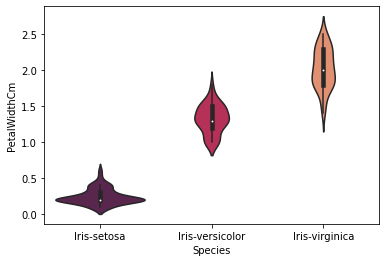

In [92]:
sns.violinplot(data=iris, x="Species", y="PetalWidthCm",palette="rocket")

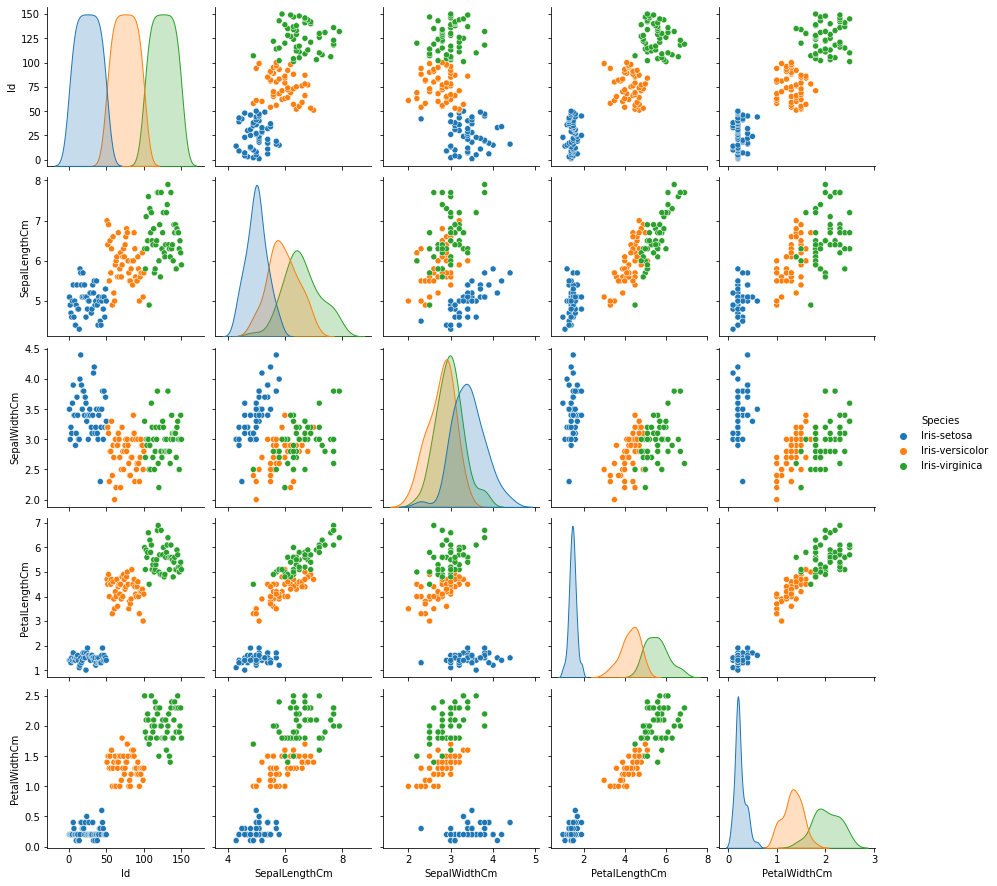

In [93]:
sns.pairplot(iris,hue='Species');

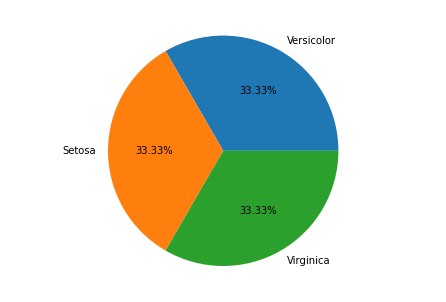

In [94]:
#distribution of different species in in form of pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

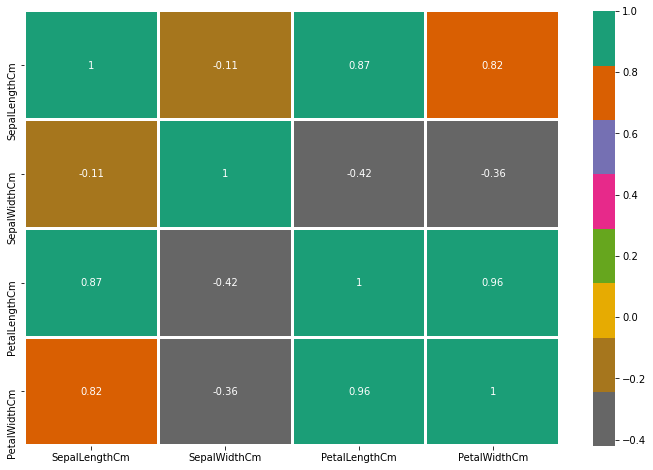

In [95]:
plt.figure(figsize=(12,8)) 
sns.heatmap(x.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [96]:
x = data.drop(columns="Species")
y = data["Species"]

##### Data Pre-processing:

In [97]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [98]:
y = iris['Species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [99]:
#Split datset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### CLASSIFICATION MODELS:

#### KNN

In [101]:
#Create an instance of the KNN classifier with k = 3
neigh = KNeighborsClassifier(n_neighbors = 3)

#Fit the model with the training data X_train and y_train
neigh.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_KNN
yhat_KNN = neigh.predict(X_test)

#Use the real values y_test and the predicted values yhat_KNN to find the accuracy of the model 
print("Accuracy of the KNN model: ", accuracy_score(y_test, yhat_KNN))

Accuracy of the KNN model:  0.9555555555555556


#### Decision Tree Classifier

In [102]:
#Create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the training data X_train and y_train
dec_tree.fit(X_train, y_train)

#Use the test data X_test to predict the output, yhat_tree
yhat_tree = dec_tree.predict(X_test)

#Use the real values y_test and the predicted values yhat_tree to find the accuracy of the model 
print("Accuracy of the Decision Tree: ", accuracy_score(y_test, yhat_tree))

Accuracy of the Decision Tree:  0.9555555555555556


Support Vector Machine

In [103]:
#Create an instance of the svm classifier using the kernel function, rbf (Radial Basis Function)
svm_model = svm.SVC(kernel='rbf', gamma = 'auto')

#Fit the model with the training data X_train and y_train
svm_model.fit(X_train, y_train)

#Use the test data X_test to predict the output, yhat_svm
yhat_svm = svm_model.predict(X_test)

#Use the real values y_test and the predicted values yhat_svm to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_svm))

Accuracy of the SVM Model : 0.9777777777777777


Logistic Regression

In [104]:
#Create an instance of the Logistic Regression classification model
#using the 'liblinear' optimizer and set C, the Inverse of regularization strength to 0.01
LR = LogisticRegression(C=0.01, solver='liblinear')

#Fit the model with the training data X_train and y_train
LR.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_LR
yhat_LR = LR.predict(X_test)

#Use the real values y_test and the predicted values yhat_LR to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_LR))

Accuracy of the SVM Model : 0.6888888888888889


Final Result Using Model is:

In [105]:
results = pd.DataFrame({
    'Model': ['KNN','Decision Tree','Support Vector Machines','Logistic Regression'],
    'Score': [0.955,0.933,0.977,0.688]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.977,Support Vector Machines
0.955,KNN
0.933,Decision Tree
0.688,Logistic Regression


#### Performance Evaluation

In [106]:
ari_kmeans = adjusted_rand_score(actual_y, kmeans.labels_)

In [107]:
round(ari_kmeans, 2)

0.73